In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Set working directory
os.chdir('C:/Users/Pavan/Desktop/Marketing_Retail/Assignment/marketbasketanalysis')

In [3]:
#Import file
order_prod_prior = pd.read_csv('order_products__prior.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_prod__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [4]:
order_prod_prior.head()
order_prod_prior.shape

aisles.head()
aisles.shape

departments.head()
departments.shape

order_prod__train.head()
order_prod__train.shape

orders.head()
orders.shape

products.head()
products.shape

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


(32434489, 4)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


(134, 2)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


(21, 2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


(1384617, 4)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


(3421083, 7)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


(49688, 4)

Text(0.5,1,'Frequency of Day of week Vs Hour of day')

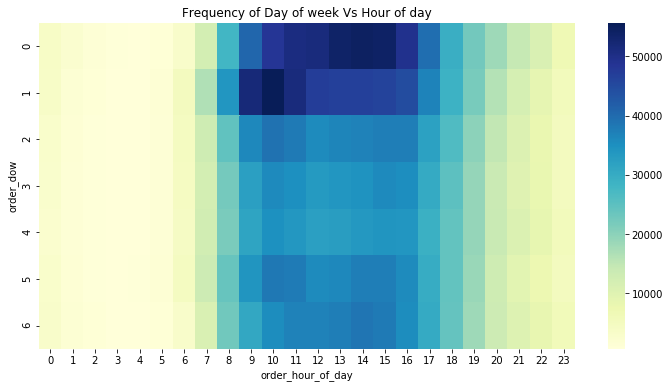

In [5]:
#Order frequency

grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Text(0,0.5,'Count')

Text(0.5,0,'Days since prior order')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

Text(0.5,1,'Frequency distribution by days since prior order')

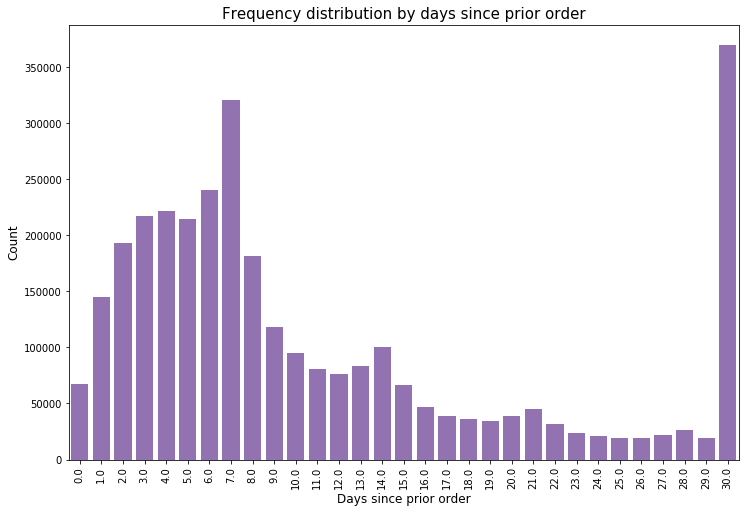

In [6]:
#Frequency distribution by days since prior order

plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Number of products in the given order')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

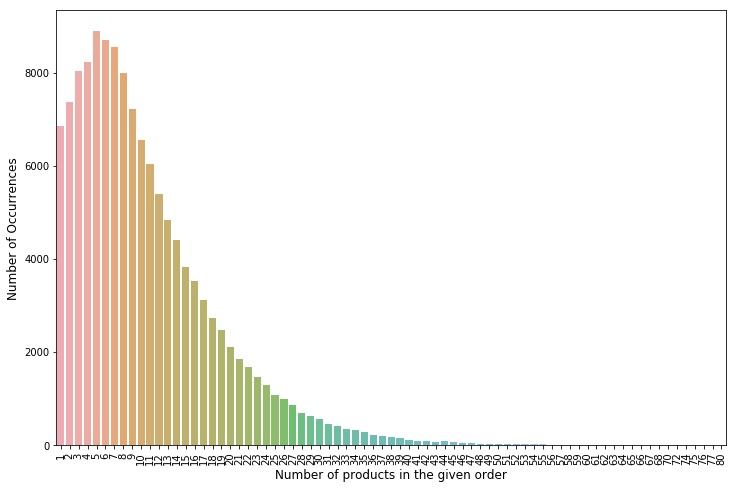

In [7]:
#Number of products - Distribution

grouped_df = order_prod__train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
prior = order_prod_prior[0:300000]

In [9]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])

In [10]:
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [11]:
products = pd.merge(products,departments,on=['department_id','department_id'])

In [12]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,dairy eggs,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,dairy eggs,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,dairy eggs,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,dairy eggs,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,dairy eggs,108932,prior,16,1,13,3.0,eggs


Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Aisle')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

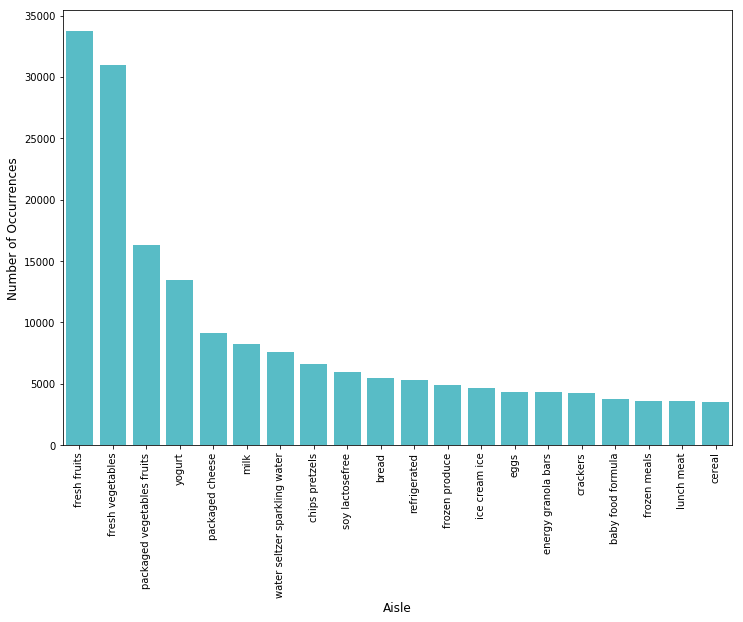

In [13]:
# Aisle ditribution

cnt_srs = mt['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

([<matplotlib.patches.Wedge at 0x22700ac7d30>,
 [Text(-0.336912,-1.04713,'produce'),
  Text(0.993266,-0.472675,'dairy eggs'),
  Text(1.02756,0.392584,'snacks'),
  Text(0.677775,0.866384,'beverages'),
  Text(0.203321,1.08105,'frozen'),
  Text(-0.232254,1.0752,'pantry'),
  Text(-0.534952,0.961159,'bakery'),
  Text(-0.729146,0.823617,'canned goods'),
  Text(-0.881402,0.658127,'deli'),
  Text(-0.986877,0.485874,'dry goods pasta'),
  Text(-1.04906,0.330876,'household'),
  Text(-1.08495,0.181318,'breakfast'),
  Text(-1.09961,0.0293326,'meat seafood'),
  Text(-1.09585,-0.0954806,'personal care'),
  Text(-1.08332,-0.19085,'babies'),
  Text(-1.06734,-0.266035,'international'),
  Text(-1.05563,-0.309282,'alcohol'),
  Text(-1.04769,-0.335186,'pets'),
  Text(-1.04162,-0.353587,'missing'),
  Text(-1.03779,-0.364681,'other'),
  Text(-1.03504,-0.372409,'bulk')],
 [Text(-0.18377,-0.571164,'29.0%'),
  Text(0.541782,-0.257823,'16.8%'),
  Text(0.560487,0.214137,'9.0%'),
  Text(0.369696,0.472573,'8.3%'),


Text(0.5,1,'Departments distribution')

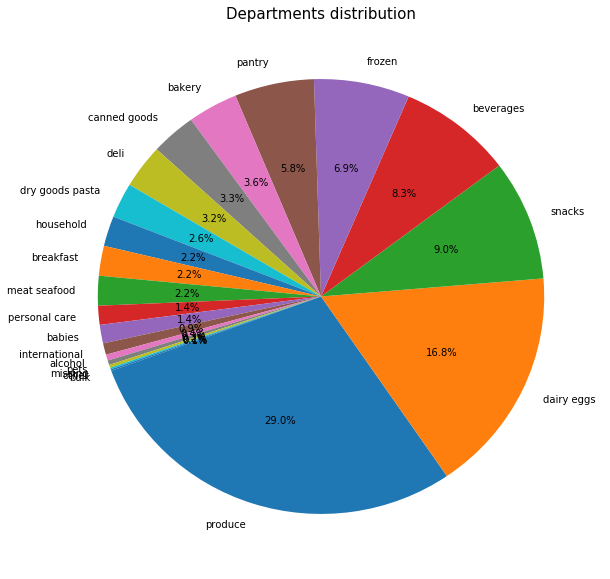

In [14]:
# Department Distribution

plt.figure(figsize=(10,10))
temp_series = mt['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Text(0,0.5,'Reorder ratio')

Text(0.5,0,'Department')

Text(0.5,1,'Department wise reorder ratio')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

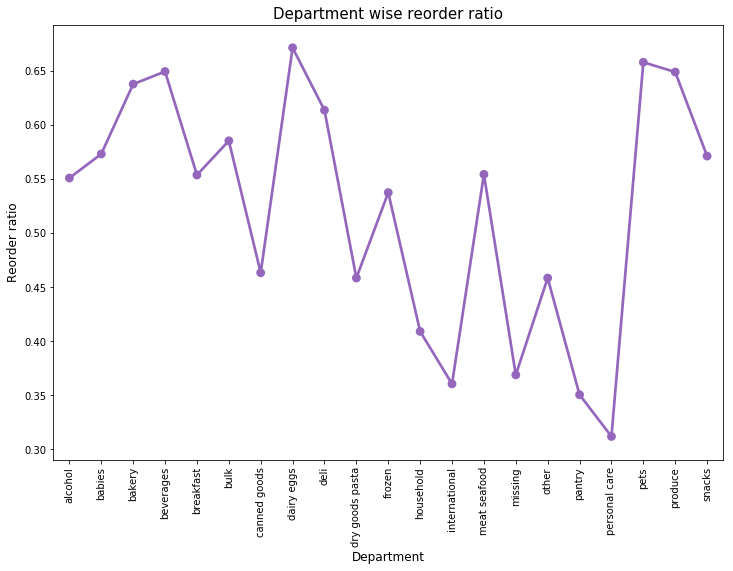

In [15]:
# Department wise reorder ratio

grouped_df = mt.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Text(0.5,1,'Reorder ratio of Day of week Vs Hour of day')

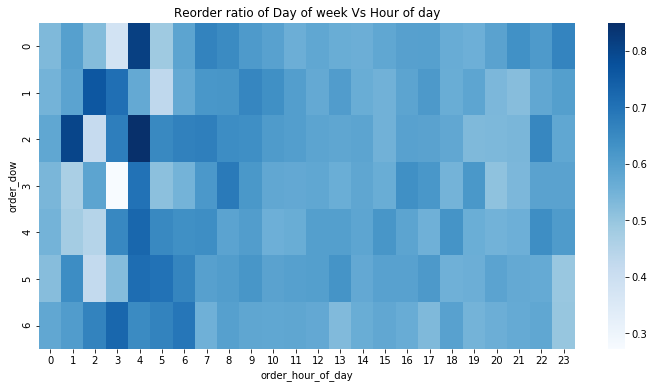

In [16]:
#Reorder ratio

grouped_df = mt.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap='Blues')
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

In [17]:
mt['product_name'].value_counts()

Banana                                                                4432
Bag of Organic Bananas                                                3563
Organic Strawberries                                                  2370
Organic Baby Spinach                                                  2242
Organic Hass Avocado                                                  1985
Organic Avocado                                                       1626
Large Lemon                                                           1380
Strawberries                                                          1343
Organic Raspberries                                                   1293
Limes                                                                 1270
Organic Whole Milk                                                    1231
Organic Garlic                                                        1011
Organic Yellow Onion                                                  1007
Cucumber Kirby           

In [18]:
len(mt['product_name'].unique())

24836

In [19]:
len(mt['aisle'].unique())

134

In [20]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     33755
fresh vegetables                 31004
packaged vegetables fruits       16319
yogurt                           13477
packaged cheese                   9133
milk                              8254
water seltzer sparkling water     7634
chips pretzels                    6581
soy lactosefree                   5965
bread                             5457
Name: aisle, dtype: int64

In [21]:
order_prod = pd.crosstab(mt['order_id'], mt['aisle'])
order_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
order_prod.shape

(29724, 134)

In [23]:
def cod(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [24]:
order_set = order_prod.applymap(cod)

In [25]:
order_set.isnull().sum().sort_values(ascending=False)

aisle
yogurt                        0
fresh dips tapenades          0
diapers wipes                 0
digestion                     0
dish detergents               0
dog food care                 0
doughs gelatins bake mixes    0
dry pasta                     0
eggs                          0
energy granola bars           0
energy sports drinks          0
eye ear care                  0
facial care                   0
feminine care                 0
first aid                     0
food storage                  0
fresh fruits                  0
cream                         0
fresh herbs                   0
fresh pasta                   0
fresh vegetables              0
frozen appetizers sides       0
frozen breads doughs          0
frozen breakfast              0
frozen dessert                0
frozen juice                  0
frozen meals                  0
frozen meat seafood           0
frozen pizza                  0
frozen produce                0
                             ..
ho

In [26]:
order_set.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(order_set, min_support=0.05, use_colnames=True)

In [28]:
frequent_itemsets.head(10)

,support,itemsets
0,0.076470,[baking ingredients]
1,0.165590,[bread]
2,0.069607,[breakfast bakery]
3,0.074048,[butter]
4,0.069338,[candy chocolate]
5,0.073375,[canned jarred vegetables]
6,0.069203,[canned meals beans]
7,0.093594,[cereal]
8,0.166297,[chips pretzels]
9,0.057529,[coffee]


In [29]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)

In [30]:
rules.head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(refrigerated),0.557832,0.131712,0.086563,0.155178,1.178161,0.013090,1.027776
1,(refrigerated),(fresh fruits),0.131712,0.557832,0.086563,0.657216,1.178161,0.013090,1.289931
2,(fresh fruits),(soup broth bouillon),0.557832,0.080339,0.051675,0.092636,1.153064,0.006860,1.013552
3,(soup broth bouillon),(fresh fruits),0.080339,0.557832,0.051675,0.643216,1.153064,0.006860,1.239316
4,(soup broth bouillon),(fresh vegetables),0.080339,0.442639,0.054064,0.672948,1.520309,0.018503,1.704197
5,(fresh vegetables),(soup broth bouillon),0.442639,0.080339,0.054064,0.122140,1.520309,0.018503,1.047617
6,"(packaged cheese, packaged vegetables fruits)",(fresh vegetables),0.115597,0.442639,0.082829,0.716531,1.618770,0.031661,1.966214
7,"(packaged cheese, fresh vegetables)",(packaged vegetables fruits),0.135648,0.366875,0.082829,0.610615,1.664367,0.033063,1.625961
8,"(packaged vegetables fruits, fresh vegetables)",(packaged cheese),0.233448,0.230824,0.082829,0.354806,1.537131,0.028943,1.192163
9,(packaged cheese),"(packaged vegetables fruits, fresh vegetables)",0.230824,0.233448,0.082829,0.358840,1.537131,0.028943,1.195571


In [31]:
rules.sort_values('lift', ascending=False).head(20)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(fresh fruits, fresh vegetables)",(fresh herbs),0.317521,0.090634,0.060658,0.191036,2.107781,0.031880,1.124112
68,(fresh herbs),"(fresh fruits, fresh vegetables)",0.090634,0.317521,0.060658,0.669265,2.107781,0.031880,2.063522
69,(fresh vegetables),"(fresh fruits, fresh herbs)",0.442639,0.068901,0.060658,0.137037,1.988915,0.030160,1.078957
64,"(fresh fruits, fresh herbs)",(fresh vegetables),0.068901,0.442639,0.060658,0.880371,1.988915,0.030160,4.659083
164,"(fresh fruits, packaged vegetables fruits)","(soy lactosefree, fresh vegetables)",0.271666,0.095142,0.050565,0.186130,1.956340,0.024718,1.111797
169,"(soy lactosefree, fresh vegetables)","(fresh fruits, packaged vegetables fruits)",0.095142,0.271666,0.050565,0.531471,1.956340,0.024718,1.554512
84,(fresh herbs),(fresh vegetables),0.090634,0.442639,0.077311,0.853007,1.927094,0.037193,3.791744
85,(fresh vegetables),(fresh herbs),0.442639,0.090634,0.077311,0.174660,1.927094,0.037193,1.101808
167,"(packaged vegetables fruits, soy lactosefree)","(fresh fruits, fresh vegetables)",0.083333,0.317521,0.050565,0.606782,1.910998,0.024105,1.735626
166,"(fresh fruits, fresh vegetables)","(packaged vegetables fruits, soy lactosefree)",0.317521,0.083333,0.050565,0.159250,1.910998,0.024105,1.090296


In [32]:
rules.sort_values('support', ascending=False).head(20)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
229,(fresh vegetables),(fresh fruits),0.442639,0.557832,0.317521,0.717337,1.285937,0.070603,1.564292
228,(fresh fruits),(fresh vegetables),0.557832,0.442639,0.317521,0.569206,1.285937,0.070603,1.293799
276,(fresh fruits),(packaged vegetables fruits),0.557832,0.366875,0.271666,0.487003,1.327435,0.067011,1.234169
277,(packaged vegetables fruits),(fresh fruits),0.366875,0.557832,0.271666,0.740486,1.327435,0.067011,1.703831
125,(fresh vegetables),(packaged vegetables fruits),0.442639,0.366875,0.233448,0.527400,1.437545,0.071054,1.339663
124,(packaged vegetables fruits),(fresh vegetables),0.366875,0.442639,0.233448,0.636314,1.437545,0.071054,1.532532
298,(fresh fruits),(yogurt),0.557832,0.264298,0.188064,0.337133,1.275578,0.040630,1.109878
299,(yogurt),(fresh fruits),0.264298,0.557832,0.188064,0.711558,1.275578,0.040630,1.532953
13,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.317521,0.366875,0.186953,0.588790,1.604878,0.070463,1.539663
17,(fresh vegetables),"(fresh fruits, packaged vegetables fruits)",0.442639,0.271666,0.186953,0.422361,1.554706,0.066703,1.260880


In [33]:
rules.sort_values('confidence', ascending=False).head(20)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(fresh fruits, fresh herbs)",(fresh vegetables),0.068901,0.442639,0.060658,0.880371,1.988915,0.030160,4.659083
163,"(packaged vegetables fruits, soy lactosefree, ...",(fresh fruits),0.058539,0.557832,0.050565,0.863793,1.548482,0.017911,3.246296
21,"(yogurt, packaged vegetables fruits, fresh veg...",(fresh fruits),0.086227,0.557832,0.074452,0.863441,1.547852,0.026352,3.237933
391,"(fresh vegetables, milk, packaged vegetables f...",(fresh fruits),0.073981,0.557832,0.063585,0.859482,1.540753,0.022316,3.146690
84,(fresh herbs),(fresh vegetables),0.090634,0.442639,0.077311,0.853007,1.927094,0.037193,3.791744
323,"(packaged cheese, packaged vegetables fruits, ...",(fresh fruits),0.082829,0.557832,0.069775,0.842405,1.510140,0.023571,2.805715
260,"(packaged vegetables fruits, soy lactosefree)",(fresh fruits),0.083333,0.557832,0.068665,0.823981,1.477112,0.022179,2.512041
346,"(packaged vegetables fruits, bread)",(fresh fruits),0.078724,0.557832,0.064863,0.823932,1.477025,0.020948,2.511342
292,"(yogurt, packaged vegetables fruits)",(fresh fruits),0.126026,0.557832,0.103687,0.822744,1.474896,0.033386,2.494520
106,"(yogurt, fresh vegetables)",(fresh fruits),0.144395,0.557832,0.117649,0.814772,1.460604,0.037101,2.387151


In [34]:
rules[(rules['lift'] >= 1.4) &
      (rules['confidence'] > 0.6) &
      (rules['support'] > 0.1)]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(fresh fruits, packaged vegetables fruits)",(fresh vegetables),0.271666,0.442639,0.186953,0.688173,1.554706,0.066703,1.787407
14,"(packaged vegetables fruits, fresh vegetables)",(fresh fruits),0.233448,0.557832,0.186953,0.800836,1.435622,0.056729,2.220118
104,"(fresh fruits, yogurt)",(fresh vegetables),0.188064,0.442639,0.117649,0.625581,1.413299,0.034405,1.488604
106,"(yogurt, fresh vegetables)",(fresh fruits),0.144395,0.557832,0.117649,0.814772,1.460604,0.037101,2.387151
124,(packaged vegetables fruits),(fresh vegetables),0.366875,0.442639,0.233448,0.636314,1.437545,0.071054,1.532532
292,"(yogurt, packaged vegetables fruits)",(fresh fruits),0.126026,0.557832,0.103687,0.822744,1.474896,0.033386,2.494520
310,"(fresh vegetables, milk)",(fresh fruits),0.125421,0.557832,0.100794,0.803648,1.440663,0.030830,2.251915
374,"(fresh fruits, packaged cheese)",(fresh vegetables),0.157146,0.442639,0.105639,0.672233,1.518694,0.036080,1.700479
